In [ ]:
!pip install tensorflow opencv-python matplotlib

In [4]:
import tensorflow as tf
import os

In [5]:
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np

C:\Users\imadc\AppData\Local\Temp\ipykernel_15220\2622808212.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_directory = 'data'

In [7]:
image_format_accepted = ['jpeg','jpg', 'bmp', 'png']

In [8]:
#to clean up the image dataset by removing images that are not in the specified list of supported image formats
for image_class in os.listdir(data_directory):
    for image in os.listdir(os.path.join(data_directory, image_class)):
        image_path = os.path.join(data_directory, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_format_accepted: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 414 files belonging to 2 classes.


In [10]:
print("Number of classes:", len(data.class_names))
print("Class names:", data.class_names)

for images, labels in data.take(1):
    print("Image data type:", images.dtype)
    print("Label data type:", labels.dtype)

Number of classes: 2
Class names: ['modi', 'sachin']
Image data type: <dtype: 'float32'>
Label data type: <dtype: 'int32'>


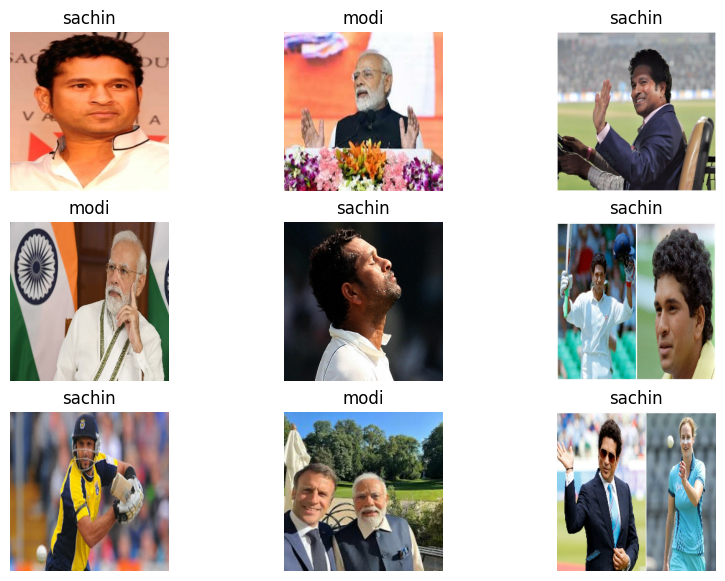

In [11]:
plt.figure(figsize=(10, 7))
for images, labels in data.take(1):
    for i in range(9):  
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(data.class_names[labels[i]])
        plt.axis("off")
plt.show()

In [12]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].shape

# shape of this array is (batch_size, height, width, channels), where:
# batch_size is the number of images in the batch.
# height is the height of each image in pixels.
# width is the width of each image in pixels.
# channels is the number of color channels in each image (3 for RGB images).

(32, 256, 256, 3)

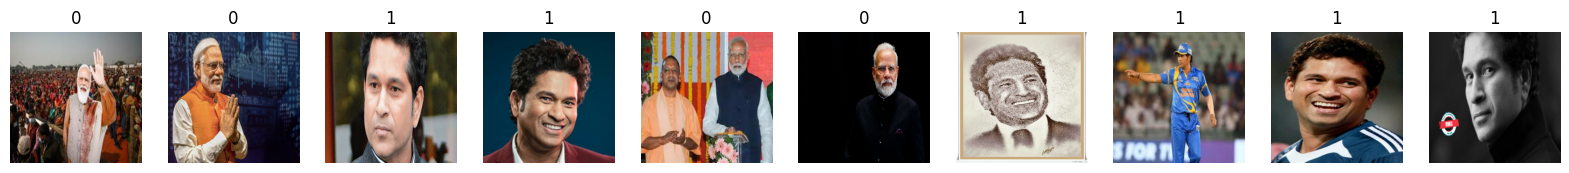

In [13]:
batch_images = batch[0]
batch_labels = batch[1]

plt.figure(figsize=(20, 3)) 

for i in range(min(10, len(batch_images))):
    image = batch_images[i]
    label = batch_labels[i]

    plt.subplot(1, 10, i + 1) 
    plt.imshow(image.astype('uint8'))  
    plt.title(format(label))
    plt.axis('off')

plt.show()

In [113]:
#image scaling to bring pixel values within the range [0, 1].
scaled = batch[0] / 255
# scaled.min() == 0.0
# scaled.max() == 1.0


In [ ]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()


In [15]:
print("Total Length of data =",len(data))

Total Length of data = 13


In [16]:
#Splitting Dataset
total_size = len(data)
train_size = int(0.8 * total_size) #80% Training data
test_size = int(0.2 * total_size)  #20% Testing data

print("train_size =", train_size)
print("test_size =", test_size)

train = data.take(train_size)
test = data.skip(train_size)

print("\ntrain_size =", len(train))
print("test_size =", len(test))



train_size = 10
test_size = 2

train_size = 10
test_size = 3


In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [119]:
model = Sequential()

In [120]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [121]:
model.compile(optimizer = 'adam' , loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [123]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

In [141]:
mod_training = model.fit(train, epochs=10)

Epoch 1/10
10/10 [==============================] - 10s 815ms/step - loss: 0.7845 - accuracy: 0.4750
Epoch 2/10
10/10 [==============================] - 8s 783ms/step - loss: 0.6407 - accuracy: 0.7219
Epoch 3/10
10/10 [==============================] - 8s 792ms/step - loss: 0.4801 - accuracy: 0.7844
Epoch 4/10
10/10 [==============================] - 10s 928ms/step - loss: 0.3815 - accuracy: 0.8406
Epoch 5/10
10/10 [==============================] - 9s 887ms/step - loss: 0.2608 - accuracy: 0.9187
Epoch 6/10
10/10 [==============================] - 10s 849ms/step - loss: 0.2046 - accuracy: 0.9156
Epoch 7/10
10/10 [==============================] - 10s 942ms/step - loss: 0.1555 - accuracy: 0.9594
Epoch 8/10
10/10 [==============================] - 11s 1s/step - loss: 0.0819 - accuracy: 0.9688
Epoch 9/10
10/10 [==============================] - 11s 1s/step - loss: 0.0580 - accuracy: 0.9906
Epoch 10/10
10/10 [==============================] - 11s 973ms/step - loss: 0.0351 - accuracy: 0.993

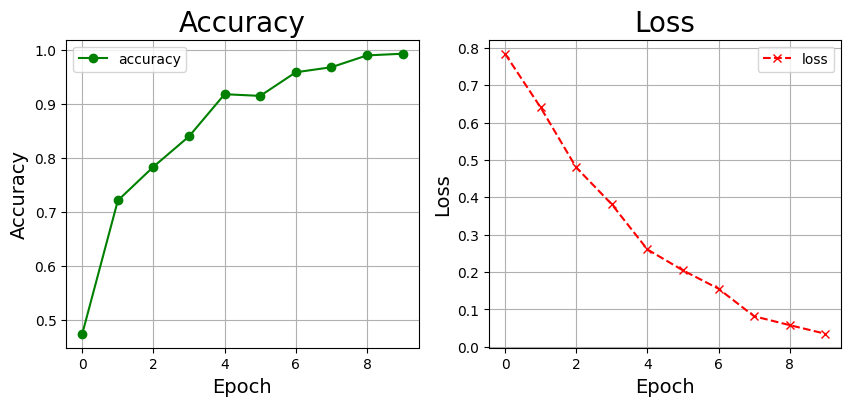

In [166]:
fig = plt.figure(figsize=(10, 4))

#Plotting the accuracy
plt.subplot(1, 2, 1)
plt.plot(mod_training.history['accuracy'], color='green', label='accuracy', linestyle='-', marker='o')
plt.title('Accuracy', fontsize=20)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc="upper left")
plt.grid(True)

# Plotting the Loss
plt.subplot(1, 2, 2)
plt.plot(mod_training.history['loss'], color='red', label='loss', linestyle='--', marker='x')
plt.title('Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc="upper right")
plt.grid(True)

plt.show()

In [84]:
test_loss, test_accuracy = model.evaluate(test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


3/3 [==============================] - 2s 180ms/step - loss: 0.0099 - accuracy: 1.0000
Test Loss: 0.009896836243569851
Test Accuracy: 1.0


In [162]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('modi1.jpg')

resize = tf.image.resize(img, (256, 256))


In [163]:
prediction = model.predict(np.expand_dims(resize / 255, 0))
prediction

1/1 [==============================] - 0s 47ms/step


array([[0.08926845]], dtype=float32)

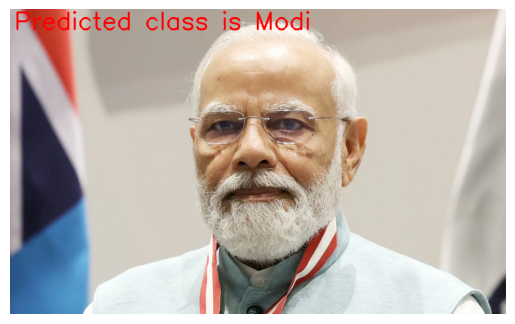

Its Modi


In [164]:
if prediction > 0.5:
    predicted_class = 'Sachin'
else:
    predicted_class = 'Modi'

font = cv2.FONT_HERSHEY_SIMPLEX
text_position = (10, 50)
font_scale = 2 
font_color = (0, 0, 255) 
font_thickness = 4

cv2.putText(img, f'Predicted class is {predicted_class}', text_position, font, font_scale, font_color, font_thickness)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print(f'Its {predicted_class}')